## Prompts for locations

In [1]:
location_prompts = [
    "steampunk city with skyscrapers",
    "cyberpunk village in Japanese rustic style",
    "fantasy dungeons and dragons",
    "noir city from 1930s",
    "StarTrek inspired spaceship",
    "undeground mine of goblins",
    "SuperMario style magic land plain",
    "SuperMario style magic land beach",
]

## Generating locations 

In [2]:
from holodeck import initialize_location
from holodeck import generate_location_and_encounters
import os
from tqdm.notebook import tqdm
import traceback

import concurrent.futures
from tqdm import tqdm

def generate_location(prompt):
    location_dict, encounters_list = generate_location_and_encounters(prompt)
    if location_dict:
        try:
            location = initialize_location(location_dict, encounters_list)
            return location
        except Exception as e:
            print("Error: ", e)
            traceback.print_exc()
    else:
        print(f"GENERATING FROM '{prompt}' failed!")
        return None

locations = []
with concurrent.futures.ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    results = list(tqdm(executor.map(generate_location, location_prompts), total=len(location_prompts), desc="Generating locations"))
    locations += [r for r in results if r is not None]



locations

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/home/standard/Holodeck/.venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Generating locations:   0%|          | 0/8 [00:00<?, ?it/s]

<
{'name': 'Goblin Mines', 'description': 'A large hole in the ground, with smoke rising from it and surrounding stones scattered about. The entrance is covered with wooden boards and makeshift walls.\n', 'buildings': [{'name': 'Mine Entrance', 'description': 'A crude entrance covered by wooden boards and surrounded by makeshift walls.', 'enterable': True}, {'name': 'Surrounding Stones', 'description': 'Large stones that have been moved to make way for the mine entrance'}], 'ways': [{'name': 'Road to the South', 'description': 'A road that leads away from the mine.'}]}

<
{'name': 'Magic Lands Plains', 'description': 'This enchanted expanse of grassy meadows is filled with floating blocks and bouncy mushrooms. A castle tower looms in the distance, visible through the occasional clouds. A path snakes off to the west, while another leads to the east.\n', 'buildings': [{'name': 'Floating Blocks', 'description': "Magical blocks that hover in the air. Maybe they'll lead to a surprise?", 'en

Generating locations:  12%|█▎        | 1/8 [00:11<01:20, 11.51s/it]

<
[{'probability': 0.1, 'description': 'On the main street, you see a vendor selling illegal steam-powered weapons', 'actions': [{'type': 'item', 'name': 'Illegal Steam-powered Weapons', 'description': 'Assorted weapons powered by steam, not sold to the general public'}], 'trigger': {'type': 'building', 'building': 'Main Street'}}, {'probability': 0.2, 'description': "On your way to the Officer's Hall you come across a suspiciously dressed individual.", 'actions': [{'type': 'character', 'name': 'Suspiciously Dressed Individual', 'description': 'A shady individual wearing a heavy cloak and dark goggles, lurking in the shadows.'}], 'trigger': {'type': 'building', 'building': "Officer's Hall"}}, {'probability': 0.1, 'description': "On the roof of the Automata Store, a malfunctioning automata is pointing it's weapon at civilians.", 'actions': [{'type': 'critter'}]}]

<
[{'probability': 0.2, 'description': 'As you walk down the path to the dungeon, you find a chest containing a magical swor

Generating locations:  25%|██▌       | 2/8 [00:11<00:30,  5.02s/it]

<
[{'probability': 0.3, 'description': 'You find a malfunctioning robot wandering along the river.', 'actions': [{'type': 'character', 'name': 'Malfunctioning Robot', 'description': 'A broken robot in search of help.'}], 'trigger': {'type': 'way', 'way': 'River'}}, {'probability': 0.1, 'description': 'You find a small safe hidden inside Watanabe Grocery.', 'actions': [{'type': 'item', 'name': 'Small Safe', 'description': 'A small safe containing a mysterious object.'}], 'trigger': {'type': 'building', 'building': 'Watanabe Grocery'}}, {'probability': 0.05, 'description': 'A mysterious figure approaches you from the shadows of the stone wall.', 'actions': [{'type': 'character', 'name': 'Mysterious Figure', 'description': 'A hooded figure with an unknown agenda.'}], 'trigger': {'type': 'building', 'building': 'Stone Wall'}}]



Generating locations: 100%|██████████| 8/8 [00:12<00:00,  1.56s/it]

<
[{'probability': 0.1, 'description': 'As you walk down Main Street, you spot a mobster in the shadows', 'actions': [{'type': 'character', 'name': 'Mobster', 'description': 'A shady character, dressed in a sharp suit, who looks too perfect for the neighbourhood.'}], 'trigger': {'type': 'way', 'way': 'Main Street'}}, {'probability': 0.3, 'description': 'The alley outside Red Lights Apartments is bustling with suspicious activity', 'actions': [{'type': 'critter', 'description': 'A group of thugs are lurking in the alley, planning something nefarious.'}], 'trigger': {'type': 'building', 'building': 'Red Lights Apartments'}}, {'probability': 0.02, 'description': "As you enter Gatsby's Speakeasy, you see a shady figure in the corner", 'actions': [{'type': 'character', 'name': 'Shady Figure'}]}]



## Generate Image Prompts

In [3]:
from holodeck.gpt_text import \
        generate_object_image_prompt, \
        generate_building_image_prompt, \
        generate_location_image_prompt

from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

locations_prompts = []
objects_image_prompts = []
buildings_image_prompts = []

def generate_location_images(location):
    return (location, generate_location_image_prompt(location))

def generate_object_images(location):
    prompts = []
    for o in location.objects:
        prompts.append((o, generate_object_image_prompt(o, location)))
    return prompts

def generate_building_images(location):
    prompts = []
    for b in location.all_buildings:
        prompts.append((b, generate_building_image_prompt(b, location)))
    return prompts

with ThreadPoolExecutor() as executor:
    location_image_futures = list(tqdm(executor.map(generate_location_images, locations), desc="Locations"))
    object_image_futures = [executor.submit(generate_object_images, location) for location in locations]
    building_image_futures = [executor.submit(generate_building_images, location) for location in locations]

    for location, prompt in location_image_futures:
        locations_prompts.append((location, prompt))
    for f in object_image_futures:
        for prompt in f.result():
            objects_image_prompts.append(prompt)
    for f in building_image_futures:
        for prompt in f.result():
            buildings_image_prompts.append(prompt)




Locations: 8it [00:02,  3.98it/s]


## Generate Images

Images:   0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

### Steampowered City

An aerial photograph of a sprawling city with Main Street, Officer's Hall, Automata Store and Sky-Scrapers during twilight with telephoto lens — at 16:9. solarpunk

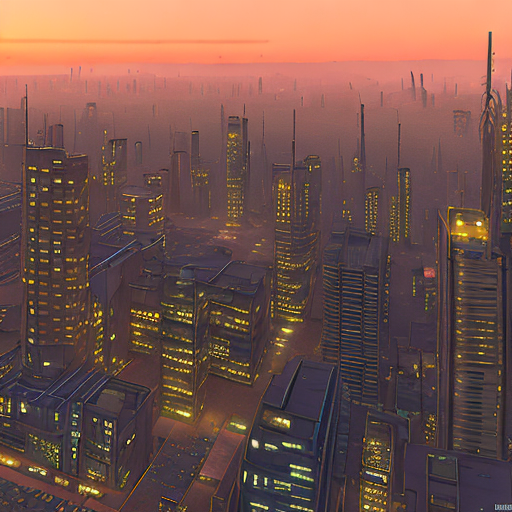

Images:   2%|▏         | 1/48 [00:04<03:27,  4.41s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Cyberpunk Village in Japanese Rustic Style



An aerial photograph of a rural Japanese village nestled in rolling hills with Watanabe Grocery, Ishiguro Dojo, and the Stone Wall during sunset with a telephoto lens — at 16:9. solarpunk.

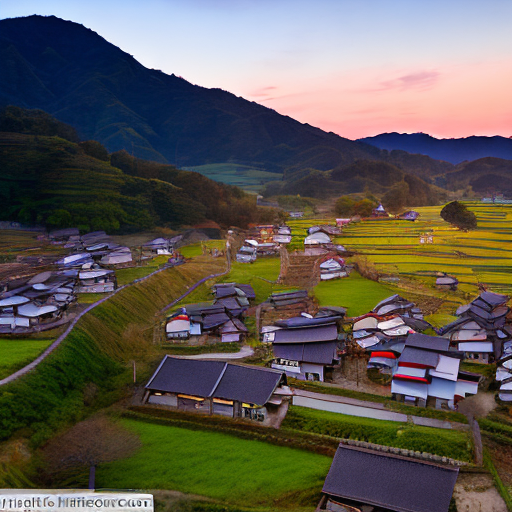

Images:   4%|▍         | 2/48 [00:07<02:46,  3.62s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Fantasy Dungeons and Dragons


An aerial photograph of a rocky mountain landscape with the Dungeon Entrance and Castle on the Peak during a full moon with natural lighting using a telephoto lens — at 16:9. solarpunk

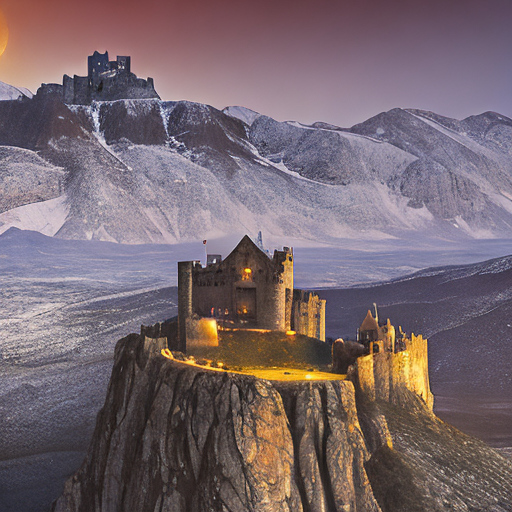

Images:   6%|▋         | 3/48 [00:10<02:31,  3.36s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Old City Noir


An aerial photograph of a city skyline filled with neon signs, vintage buildings and cobblestone streets with Gatsby's Speakeasy, Red Lights Apartments, and Molly's Bar during evening twilight with a tilt-shift lens — at 16:9. Solarpunk.

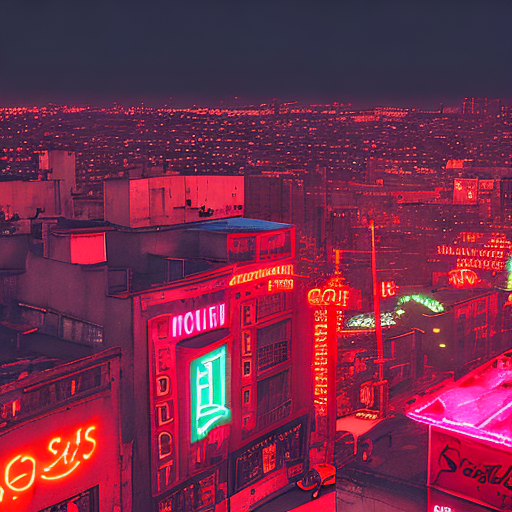

Images:   8%|▊         | 4/48 [00:13<02:22,  3.23s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Starfleet Shipyards


An aerial photograph of a bustling shipyard with Launch Platform, Engineering Bay, and Blast Shield during pre-dawn with ultraviolet lighting using a teleskop lens — at 16:9. solarpunk.

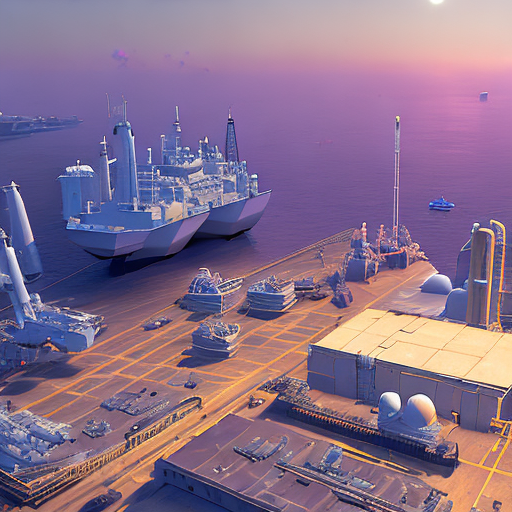

Images:  10%|█         | 5/48 [00:16<02:16,  3.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Goblin Mines

"An aerial photograph of a landscape with a mine entrance and surrounding stones during the night with an infrared lens — at 16:9. solarpunk"

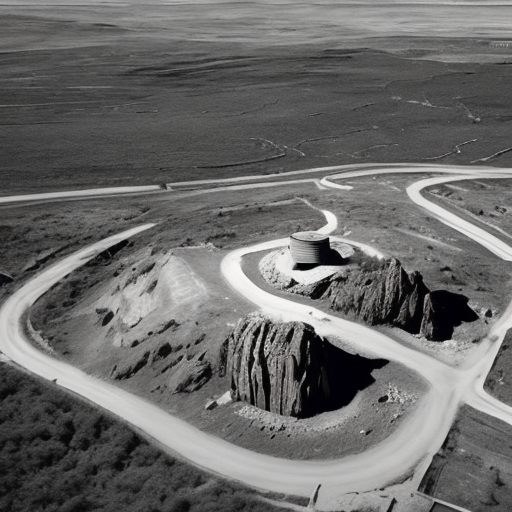

Images:  12%|█▎        | 6/48 [00:19<02:11,  3.14s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Magic Lands Plains

An aerial photograph of a grassy meadow with floating blocks, bouncy mushrooms and castle tower during sunrise with wide-angle lens — at 16:9. solarpunk

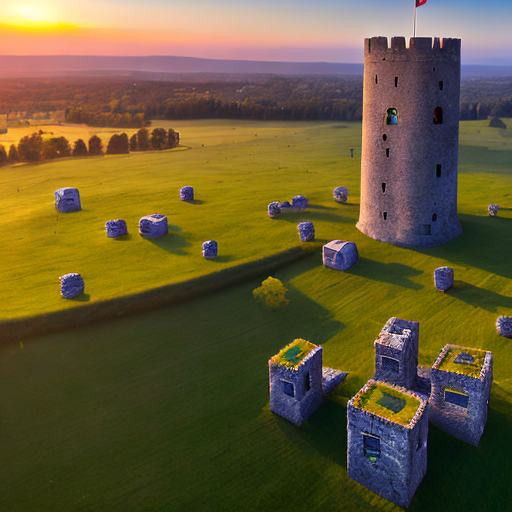

Images:  15%|█▍        | 7/48 [00:22<02:08,  3.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Magical Beachland


An aerial photograph of a beach in the late afternoon with pastel sunlight filtering through a telephoto lens — at 16:9. solarpunk

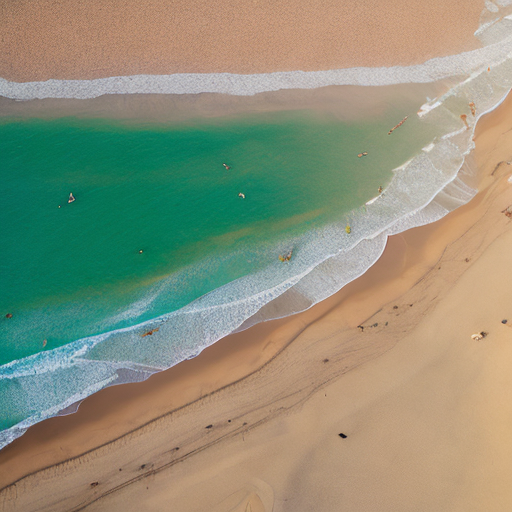

Images:  17%|█▋        | 8/48 [00:25<02:05,  3.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

### Illegal Steam-powered Weapons


The entire collection of illegal steam-powered weapons is visible, consisting of assorted weapons powered by steam, not sold to the general public, against a background of brass-covered buildings and smoke-filled skies during the early morning with faint light coming through the smog. Solarpunk.

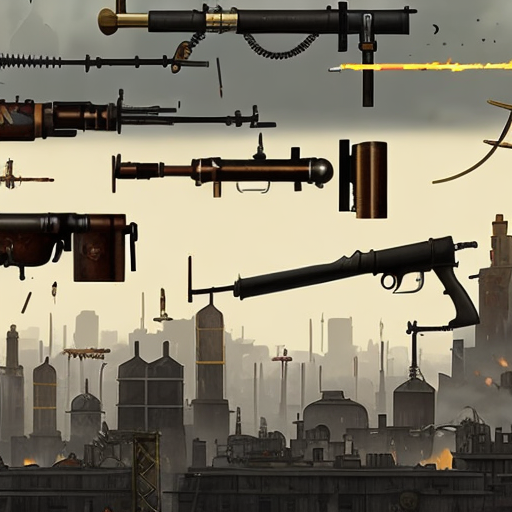

Images:  19%|█▉        | 9/48 [00:29<02:01,  3.12s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

In [4]:
from holodeck.gpt_image import generate_image
from IPython.display import display, Markdown

img_prompts = locations_prompts + objects_image_prompts + buildings_image_prompts

images = []

for obj, prompt in tqdm(img_prompts, desc="Images"):
    image = generate_image(prompt)
    display(Markdown(f"### {obj.name}"))
    display(Markdown(prompt))
    display(image)
    image_file_name = f".images/{obj.name}.jpg"
    image.save(image_file_name)
    images.append((obj, prompt, image_file_name))

len(images)


## Display Images

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import PIL.Image as Image


# define the grid layout
grid = widgets.GridBox(
    layout=widgets.Layout(
        grid_template_columns="repeat(4, 1fr)",
        grid_gap="10px"
    )
)

# define a function to create the widget for each tuple
def create_item_widget(obj, text, img_path):
    def load_image():
        with open(img_path, 'rb') as f:
            image = f.read()
        img_widget.value = image
    img_widget = widgets.Image(format="jpg", width=150, height=150)
    img_widget.on_displayed(load_image)
    obj_widget = widgets.HTML(f'<h3 style="font-size: 9px; line-height: 1.0;">{obj.name}</h3>')
    text_widget = widgets.HTML(f'<p style="font-size: 8px; line-height: 1.0;">{text}</p>')
    return widgets.VBox([img_widget, obj_widget, text_widget])

# loop through the data and create a widget for each tuple
for i, (obj, text, img_path) in enumerate(images):
    item = create_item_widget(obj, text, img_path)
    grid.children += (item,)
    
# display the grid
display(grid)


GridBox(children=(VBox(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x0…